In [4]:
import pandas as pd 
import sklearn as sk 
from matplotlib import pyplot as plt 

In [134]:
df = pd.read_csv('out.txt',delim_whitespace=True,names=["frame","class","x","y","w","h"])

In [146]:
df.head(10)
df2 = df[:7]
df2

,frame,class,x,y,w,h,Area,width_heigth_ratio,dist
0,1,2,0.949479,0.470417,0.100000,0.144167,0.014417,0.693640,1.419896
1,1,5,0.305208,0.468333,0.041667,0.070000,0.002917,0.595239,0.773541
2,1,5,0.261198,0.473750,0.051562,0.079167,0.004082,0.651316,0.734948
3,1,7,0.439063,0.492500,0.064583,0.088333,0.005705,0.731132,0.931563
4,1,2,0.098958,0.509583,0.097917,0.109167,0.010689,0.896944,0.608541
5,1,7,0.172656,0.497917,0.057813,0.082500,0.004770,0.700758,0.670573
6,1,11,0.898958,0.326667,0.031250,0.066667,0.002083,0.468750,1.225625


In [153]:
area = df['h'] * df['w']
width_heigth_ratio = df['w']/df['h']
dist = df['x']+ df['y']
print(area.shape)

(3172,)


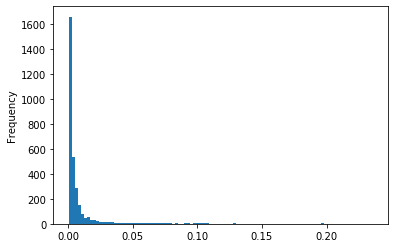

In [137]:
area.plot.hist(bins=100)

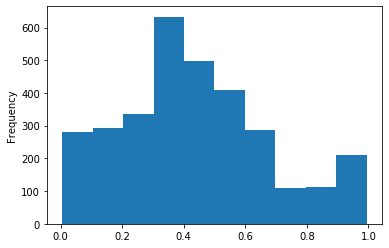

In [138]:
df['x'].plot.hist()

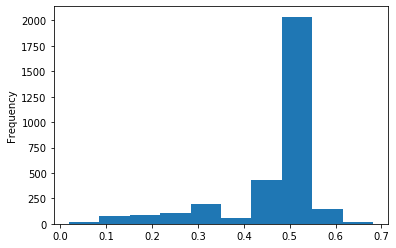

In [139]:
df['y'].plot.hist()

In [140]:
df.insert(df.shape[1], "Area", area, True) 
df.insert(df.shape[1], "width_heigth_ratio", width_heigth_ratio, True) 
df.insert(df.shape[1], "dist", dist, True) 

In [141]:
df['dist'].describe()

count    3172.000000
mean        0.895630
std         0.251137
min         0.122031
25%         0.708372
50%         0.866172
75%         1.051184
max         1.599323
Name: dist, dtype: float64

Text(0, 0.5, 'X Pose')

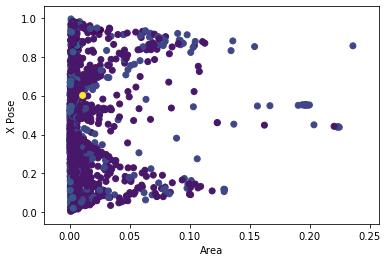

In [142]:
plt.scatter(df['Area'],df['x'],c=df['class'])
plt.xlabel('Area')
plt.ylabel('X Pose')

In [132]:
df['width_heigth_ratio'].describe()

,width_heigth_ratio,width_heigth_ratio
count,3172.000000,3172.000000
mean,0.767352,0.767352
std,0.323573,0.323573
min,0.121528,0.121528
25%,0.591139,0.591139
50%,0.757042,0.757042
75%,0.937498,0.937498
max,2.430961,2.430961


In [71]:
print()

In [74]:
X = df[['Area','width_heigth_ratio']]


In [75]:
#scale correctly for k means algorithm as we are using distances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

In [76]:
from sklearn.cluster import KMeans
scores = []
for n in range(2, 10):
    model = KMeans(n_clusters = n)
    model.fit(X_transformed)
    scores.append(model.inertia_)

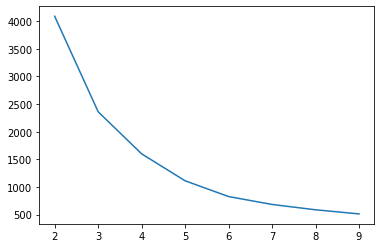

In [77]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores)
plt.show()

In [78]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6)
model.fit(X_transformed)
# LabelS
labels = model.labels_

#CentroidS
centers = model.cluster_centers_
# scale centers back 
centers_transformed = scaler.inverse_transform(centers)

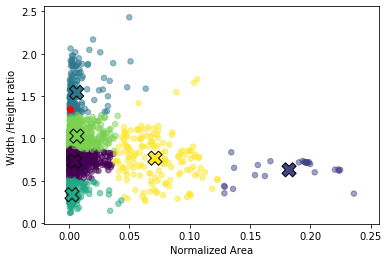

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

# Points
plt.scatter(df["Area"], df["width_heigth_ratio"], c = labels, alpha = 0.5, s = 30)
plt.scatter(df['Area'][213],df["width_heigth_ratio"][213],c = 'r')
# Centroids
plt.scatter(
    centers_transformed[:, 0], 
    centers_transformed[:, 1], 
    c = range(len(centers_transformed)), 
    marker = "X", edgecolor = 'black',
    s = 200)

plt.ylabel("Width /Height ratio ")
plt.xlabel("Normalized Area")

plt.show()

In [118]:
import numpy as np 
x = np.where(labels==2)
print(x)

(array([  37,  213,  222,  226,  234,  249,  251,  255,  257,  263,  265,
        271,  273,  277,  284,  293,  296,  297,  306,  309,  317,  320,
        324,  330,  331,  340,  343,  354,  356,  357,  363,  366,  367,
        370,  372,  375,  376,  378,  382,  383,  388,  399,  402,  441,
        489,  491,  499,  500,  508,  557,  654,  664,  674,  684,  694,
        707,  717,  733,  745,  758,  764,  769,  779,  794,  832,  858,
        874,  881,  891,  896,  912,  914,  922,  928,  929,  936,  948,
        954,  958,  965,  976,  991, 1005, 1021, 1035, 1050, 1065, 1067,
       1075, 1086, 1090, 1096, 1103, 1109, 1122, 1135, 1148, 1164, 1175,
       1200, 1272, 1283, 1284, 1288, 1305, 1312, 1313, 1333, 1334, 1338,
       1352, 1369, 1427, 1555, 1564, 1582, 1591, 1614, 1618, 1621, 1628,
       1641, 1645, 1651, 1656, 1665, 1696, 1703, 1706, 1726, 1747, 1754,
       1839, 2017, 2030, 2055, 2057, 2065, 2079, 2082, 2091, 2171, 2173,
       2182, 2188, 2192, 2194, 2248, 2255, 2264, 2

In [119]:
count = list(labels).count(0)
print(count)
count = list(labels).count(1)
print(count)
count = list(labels).count(2)
print(count)
count = list(labels).count(3)
print(count)
count = list(labels).count(4)
print(count)
count = list(labels).count(5)
print(count)

1418
27
192
652
736
147


In [120]:
cluster_dict = {}
for i in range(len(labels)): 
    if(labels[i]==2):
        if df['class'][i] not in cluster_dict : 
            cluster_dict[df['class'][i]] = 1
        else : 
            cluster_dict[df['class'][i]] += 1

In [124]:
print(cluster_dict)
print(len(df[df['class']==0]))



{7: 5, 2: 183, 9: 1, 6: 1, 5: 1, 33: 1}
18


#### We observe that  outliers in the Area/X position case only consist of trucks (21) and cars(3), as the truck/car ratio is very high here, we suggest that this is based on the fact that most points cluster around the middle of the image as x is about 0.5 in most cases (Car is right in front of our car). When we are too close to the car in front, the whole frame is almost filled with this one car. The neural network is not able to reason about the cars (trucks) features in a more global way as features like the side of the car are not visible. Therefore features like the bed of the pickup truck are not distinguishable, misleading the neural net into thinking it is a pickup truck. 

In [19]:
area_cars = []
area_trucks = []
for i in range(df.shape[0]): 
    if df['class'][i] ==7 : 
        area_trucks.append(df['Area'][i])
    elif     df['class'][i] == 2 :
        area_cars.append(df['Area'][i])

(array([146.,  26.,  12.,   7.,   7.,  10.,  11.,   9.,  10.,   0.,   4.,
          3.,   1.,   1.,   1.,   0.,  10.,   1.,   2.,   2.]),
 array([0.0019184 , 0.01362449, 0.02533058, 0.03703667, 0.04874277,
        0.06044886, 0.07215495, 0.08386104, 0.09556713, 0.10727322,
        0.11897931, 0.13068541, 0.1423915 , 0.15409759, 0.16580368,
        0.17750977, 0.18921586, 0.20092195, 0.21262804, 0.22433414,
        0.23604023]),
 <a list of 20 Patch objects>)

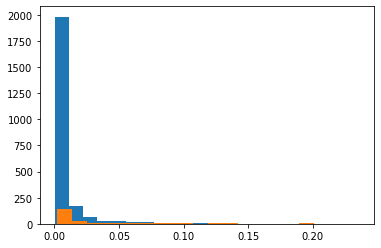

In [55]:
import numpy as np 

plt.hist(area_cars, density=False, bins=20)
plt.hist(area_trucks, density=False, bins=20) 

In [33]:
len(df[df['class']==7])
len(area_trucks)

263

In [151]:
top_left = []
top_right = []
bot_right = []
bot_left = []

for i in range(df2.shape[0]): 
       bot_left[]

0
1
2
3
4
5
6
